# Indipendent Component Analyses

[sklearn.decomposition.FastICA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html)

Independent component analysis separates a multivariate signal into additive subcomponents that are maximally independent. It is implemented in scikit-learn using the Fast ICA algorithm. Typically, ICA is not used for reducing dimensionality but for separating superimposed signals. Since the ICA model does not include a noise term, for the model to be correct, whitening must be applied. This can be done internally using the whiten argument or manually using one of the PCA variants.

Usable examples: [Faces dataset decompositions](http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html)

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os, sys
import numpy as np
from skimage import io
import matplotlib.pylab as plt
sys.path += [os.path.abspath('.'), os.path.abspath('..')]  # Add path to root
import notebooks.notebook_utils as uts

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## load datset

loading dataset: (True) exists -> /mnt/30C0201EC01FE8BC/TEMP/atomicPatternDictionary_v0/datasetFuzzy_raw
loading (True) <- /mnt/30C0201EC01FE8BC/TEMP/atomicPatternDictionary_v0/dictionary/atlas.png


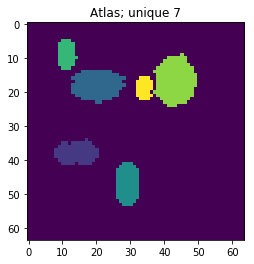

In [2]:
p_dataset = os.path.join(uts.DEFAULT_PATH, uts.SYNTH_DATASETS_FUZZY[0])
print ('loading dataset: ({}) exists -> {}'.format(os.path.exists(p_dataset), p_dataset))

p_atlas = os.path.join(uts.DEFAULT_PATH, 'dictionary/atlas.png')
atlas_gt = io.imread(p_atlas)
nb_patterns = len(np.unique(atlas_gt))
print ('loading ({}) <- {}'.format(os.path.exists(p_atlas), p_atlas))
plt.imshow(atlas_gt, interpolation='nearest')
_ = plt.title('Atlas; unique %i' % nb_patterns)

In [3]:
list_imgs = uts.load_dataset(p_dataset)
print ('loaded images #', len(list_imgs))
img_shape = list_imgs[0].shape
print ('image shape:', img_shape)

loaded images # 800
image shape: (64, 64)


**Pre-Processing**

input data shape: (800, 4096)


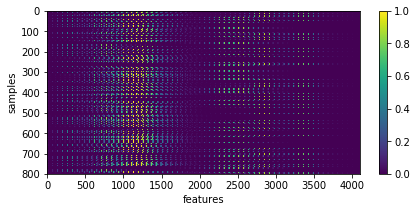

In [15]:
X = np.array([im.ravel() for im in list_imgs]) # - 0.5
print ('input data shape:', X.shape)

plt.figure(figsize=(7, 3))
_= plt.imshow(X, aspect='auto'), plt.xlabel('features'), plt.ylabel('samples'), plt.colorbar()

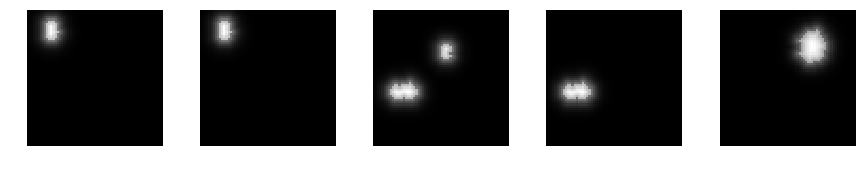

In [6]:
uts.show_sample_data_as_imgs(X, img_shape, nb_rows=1, nb_cols=5)

## FastICA

In [7]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=nb_patterns, max_iter=999, whiten=True)

X_new = ica.fit_transform(X) # Reconstruct signals
print ('fitting parameters:', ica.get_params())
print ('number of iteration:', ica.n_iter_)

fitting parameters: {'fun_args': None, 'algorithm': 'parallel', 'max_iter': 999, 'random_state': None, 'n_components': 7, 'tol': 0.0001, 'fun': 'logcosh', 'w_init': None, 'whiten': True}
number of iteration: 19


**representation of estimated components - disctionary**

estimated mixing matrix: (4096, 7)


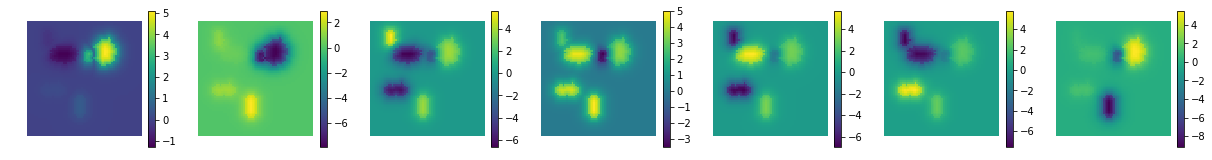

In [8]:
print ('estimated mixing matrix:', ica.mixing_.shape)
# print 'ICA mean:', ica.mean_

uts.show_sample_data_as_imgs(ica.mixing_.T, img_shape, nb_cols=nb_patterns, bool_clr=True)

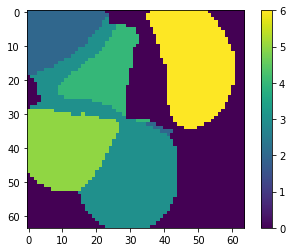

In [9]:
comp = ica.mixing_.T
ptn_used = np.sum(np.abs(X_new), axis=0) > 0
atlas_ptns = comp[ptn_used, :].reshape((-1, ) + list_imgs[0].shape)

atlas_ptns = comp.reshape((-1, ) + list_imgs[0].shape)
atlas_estim = np.argmax(atlas_ptns, axis=0)
atlas_sum = np.sum(np.abs(atlas_ptns), axis=0)
atlas_estim[atlas_sum < 1e-1] = 0
_ = plt.imshow(atlas_estim, interpolation='nearest'), plt.colorbar()

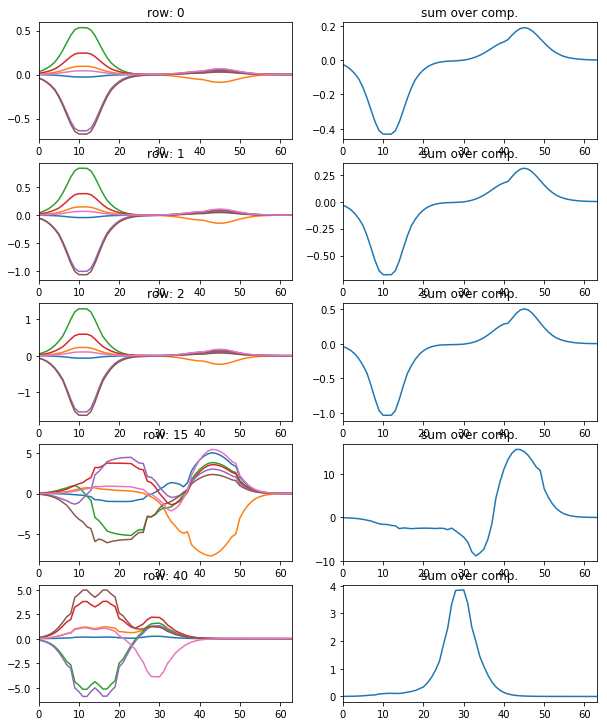

In [11]:
l_idx = [0, 1, 2, 15, 40]
fig, axr = plt.subplots(len(l_idx), 2, figsize=(10, 2.5 * len(l_idx)))
for i, idx in enumerate(l_idx):
    axr[i, 0].plot(atlas_ptns[:,idx,:].T), axr[i, 0].set_xlim([0, 63])
    axr[i, 0].set_title('row: {}'.format(idx))
    axr[i, 1].plot(np.sum(atlas_ptns[:,idx,:].T, axis=1)), axr[i, 1].set_xlim([0, 63])
    axr[i, 1].set_title('sum over comp.')

**show the particular coding of each sample**

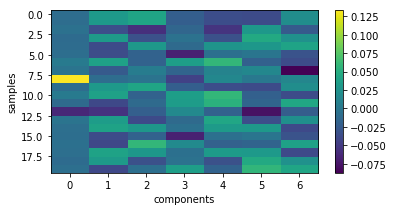

In [12]:
plt.figure(figsize=(6, 3))
plt.imshow(X_new[:20,:], interpolation='nearest', aspect='auto'), plt.colorbar()
_= plt.xlabel('components'), plt.ylabel('samples')

**backword reconstruction from encoding and dictionary**

In [13]:
res = np.dot(X_new, ica.mixing_.T)# + ica.mean_
print ('ICA mean', ica.mean_)
print ('ICA model by reverting the unmixing', res.shape)

ICA mean [ 0.          0.          0.         ...,  0.00305882  0.00227451
  0.00213725]
ICA model by reverting the unmixing (200, 4096)


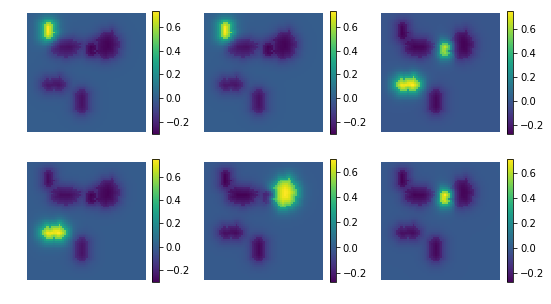

In [17]:
uts.show_sample_data_as_imgs(res, img_shape, nb_rows=2, nb_cols=3, bool_clr=True)